# Data exploration

## I- Import relevant librairires

In [37]:
import os
import sys
import torch
import matplotlib.pyplot as plt

Below, you can import the different modules coded in ``WeakSegNet/src``

In [38]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..")) # This is the repo directory: WeakSegNet/
SRC_PATH = os.path.join(BASE_DIR, "src")
sys.path.append(SRC_PATH)

from dataset import OxfordPet, data_loading

## II- Load the data

In [39]:
# Sanity check: are the trainval.txt and test.txt files available

FILE_PATH = os.path.join(BASE_DIR, "data")

split = "trainval" # or "test"
print(f"Looking for {split}.txt in:", os.path.join(FILE_PATH, "annotations", f"{split}.txt"))
print("Does the file exists?", os.path.exists(os.path.join(FILE_PATH, "annotations", "test.txt")))

Looking for trainval.txt in: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt
Does the file exists? True


In [40]:
image_size = 256
batch_size_train, batch_size_val, batch_size_test = 16, 16, 16
val_split = 0.2
train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = data_loading(
                                                                    path=FILE_PATH,
                                                                    image_size=image_size,
                                                                    batch_size_train=batch_size_train,
                                                                    batch_size_val=batch_size_val,
                                                                    batch_size_test=batch_size_test,
                                                                    val_split = val_split
                                                                    )


----Loading data
Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt
Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\test.txt

[Data loaded succesfully]
Total train+val set: 3680 -> Train: 2944 | Val: 736
Test set: 3669


## III- Data visualisation

In [41]:
image, mask, info = train_dataset[35]

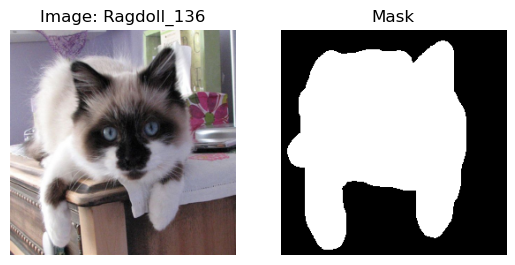

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Image: {info['name']}")
plt.axis('off')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(mask.squeeze(), cmap="grey")
plt.title("Mask")
plt.axis('off')

plt.grid(False)
plt.show()

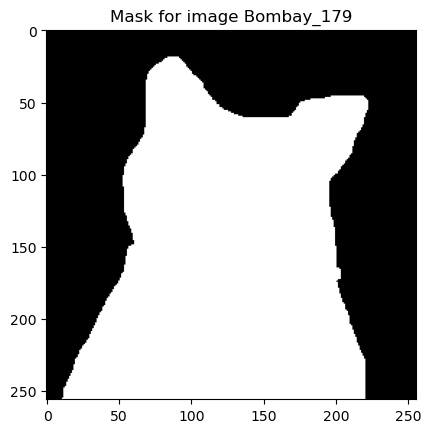

In [43]:
image, mask, info = train_dataset[90]
plt.imshow(mask.squeeze(), cmap="gray")
plt.title(f"Mask for image {info['name']}")
plt.show()

In [44]:
unique_vals = torch.unique(mask)
print("Unique mask values:", unique_vals)

Unique mask values: tensor([0., 1.])
